## ■ 4장. 신경망 학습

앞장에서는 저자가 만들어온 가중치 값을 가지고 신경망을 구성했기 때문에 신경망을 학습 시킬 필요는 없었다.

필기체7 --> 3층 신경망 --> 예측값 == 실제값 -> 정확도 추출


__3층 신경망__ : 저자가 만들어온 가중치 값 세팅(sample_weight.pkl)  
__3층 신경망의 가중치__ (W1 : 784 x 50 , W2 : 50 x 100 , W3 : 100 x 10, b1 : 50, b2 : 100, b3 : 10)  

## 4장에서는 우리가 직접 신경망을 학습 시킬 것이다.

신경망을 학습 시키기 위해서 알아야 하는 내용?

1. 오차함수
2. 미니배치(mini batch)
3. 가중치를 갱신하는 방법 (수치미분)

## ■ 1. 손실(오차)함수 p.111

" 예상값과 실제값과의 오차를 신경망에 역전파 시켜주기 위해서 필요한 함수 " 

- 오차가 최소화 될 때까지 신경망을 학습 시키기 위해서 필요한 함수
- 신경망의 잘못을 꺠닫게 해주는 함수

1. 평균제곱오차함수 ( mean squared error ) : 회귀분석시 사용
2. 교차 엔트로피 오차함수 ( cross entropy error ) : 분류문제를 풀 때 사용

## ■ 평균제곱오차 ( mean squered error) p.112

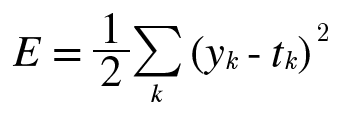

## 예제1. 위의 식을 보고 평균제곱 오차 함수를 만드시오!

In [1]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
def mean_squared_error(y,t):
    return np.mean(np.sum((y-t)**2))

## 예측2. 아래의 예측값(y)와 실제값(t)의 오차가 어떻게 되는지 확인하시오!

In [9]:
import numpy as np

y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 숫자 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 숫자 2


def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


## 예제3. 아래의 예측값을 숫자 실제 라벨 숫자7과의 오차를 구하시오.

y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [11]:
y = [ 0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 숫자 2로 예측
t = [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] # 숫자 7

def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

print(mean_squared_error(np.array(y), np.array(t))) # 0.5975 <- 오차가 크다. (오차가 더 작을수록 정답에 더 가까운 걸로 판단.)

0.5975


### ※ 설명 : 0.59의 오차를 신경망으로 역전파 시켜서 가중치(W)를 갱신한다.

## ■ 교차엔트로피 오차함수 p113

" 분류는 회귀일 때 보다 더 큰 오차를 발생 시켜줘야 함으로써 다른 수학공식이 필요하다.

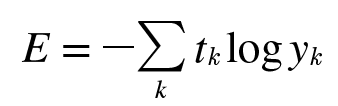

### tk : 정답  
### yk : 예측  

In [ ]:
y1 = [ log(0.1), log(0.05), log(0.6), log(0.0), log(0.05), log(0.1), log(0.0), log(0.1), log(0.0), log(0.0)] # 숫자 2로 예측
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 숫자 2
# 평균제곱오차함수 : 0.097, 교차엔트로피 : 0.51

y2 = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 숫자 7로 예측
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 숫자 2
# 평균제곱오차함수 : 0.59 , 교차엔트로피 : 2.3

In [13]:
# 로그 값 알기

result = np.log(0.6)
print(result) 

-0.5108256237659907


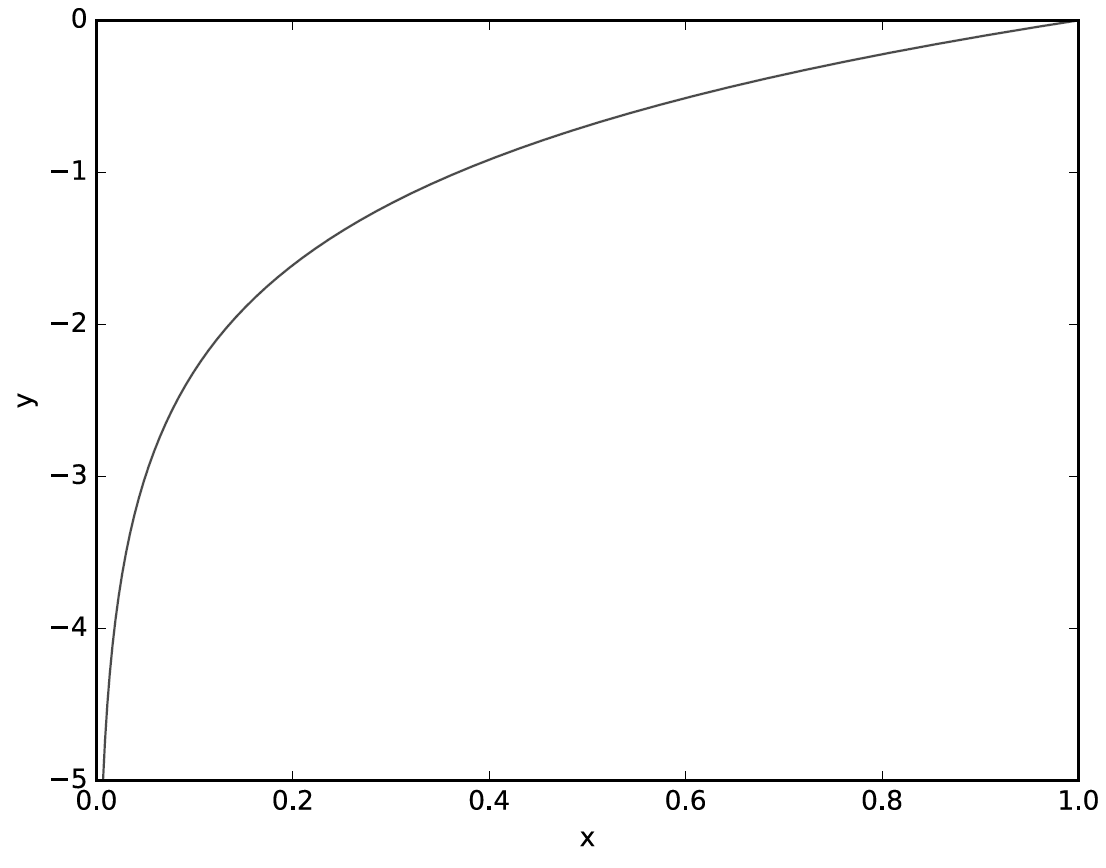

## 문제39.   
## 책 114페이지의 식 4.2를 보고 교차엔트로피 함수를 생성하고 아래의 예측값과   
## 타겟의 오차인 2.3을 출력하시오!

### 책 115페이지를 보고 만드세요~

y2 = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 숫자 7로 예측  
t = [ 0, 0, 1, 0, 0, 0, 0, 1, 0, 0] # 숫자 2


print( cross_entropy_error(np.array(y2), np.array(t)))

In [2]:
import numpy as np
def cross_entropy_error(y,t):
    y2 = y+0.00000000000001
    return -(np.sum(t*np.log(y2)))

y2 = [ 0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 숫자 7로 예측
t = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 숫자 2

print( cross_entropy_error(np.array(y2), np.array(t)))

2.3025850929939455


## 교차 엔트로피 함수 생성

In [ ]:
def cross_entropy_error(y,t):
    delta = 1e-7 #0.000001 0이 7개
    return -np.sum(t*np.log(y+delta))

### ※ 왜 교차엔트로피 수학식과는 다르게 y값에 0.0000001 을 더했는가?

### 답:  
np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 출력이 되어 더 이상 계산을 진행할 수 없기 때문이다.  
그래서 아주 작은 값을 더해서 절대 0이 되지 않게 한것이다.  

분류할 때는 mse가 아니라 오차가 더 큰 Cross entropy error 함수를 사용해야 합니다.

## ■ 신경망 학습을 위해서 알아야하는 3가지

1. 오차함수(p 111)
2. 미니배치(p 115)
3. 수치미분(p 121)

## ■ 미니배치란(mini batch)란? p115

" 훈련 데이터중에서 일부만 골라서 학습하는 방법 "

" 표본을 뽑아서 학습시킨다. "

어제는 테스터 데이터 10000장 중에서 100장만 신경망에 입력했다. --> 저자가 가중치 매개변수(w,b)를 잘 만들었는지 확인하려고 했다.  

오늘은 신경망을 훈련시켜야하므로 훈련 데이터 6만장을 신경망에 넣고 학습을 시킬 것이다.

6만장 --------------> 신경망

6만장을 1장씩 입력 -------------> 신경망(시간이 많이 걸린다.)
6만장을 100장씩 입력 -----------> 신경망(학습시간을 빨라짐.)

__복원추출__이든 __비복원 추출__이든 mnist의 경우 100장씩 배치(batch)로 신경망에 입력할 때 600번을 훈련시키면 그게 __1에폭(epoch)__이다.

1에폭(epoch) -> 책한권 전체를 1번 읽는 개념.


60000만장 : 100장 x 600번

In [27]:
# 처음의 w은 랜덤으로 생성 (대신 정규분포로 따르는 랜덤 데이터를 생성 -> 그래야 학습이 잘 됨.)

import numpy as np
print(np.random.randn(784,100)) # 2행 3열의 행렬을 만들고, 0~1 사이의 랜덤값(실수)을 생성.

[[-0.44581166  0.29078023 -0.11351071 ... -1.75474224  0.43743717
   0.39626668]
 [ 1.45604626  3.34464166  0.98779622 ...  0.84547576  0.49910584
   1.18442046]
 [ 1.99679952 -0.83076287 -0.32167069 ... -1.3864284  -0.40679073
   0.02142793]
 ...
 [-0.40073326 -0.7063316  -0.10370649 ...  0.25112406 -1.13250936
  -1.55913821]
 [ 0.66948703 -0.64719296 -1.22846301 ...  0.01979395  0.72392347
  -0.32047953]
 [-1.52493571 -0.79096702  0.15613442 ... -0.91378686  2.00802491
   0.6866106 ]]


### 60000장을 모두 다 학습하고 한걸음 가는게 아니라  
### 100장씩 학습하면서 한걸음 가는 것이다.  
### 100장씩 학습하면 조금씩 가는게 60000장을 모두 학습하고 한걸음 가는 것보다 훨씬 속도가 빠르다.  

## 예제1. 1~60000의 숫자중에서 무작위로 10개를 출력하시오!

In [34]:
import numpy as np

print(np.arange(60000))
print(np.random.choice(np.arange(60000),10))

[    0     1     2 ... 59997 59998 59999]
[ 3371 40809 26020 55898 39209 17520 20574 52834  3091 50139]


## 예제2. 0~60000 까지의 숫자중에서 무작위로 100개를 추출하시오!

In [35]:
import numpy as np

print(np.arange(60000))
print(np.random.choice(np.arange(60000),100))

[    0     1     2 ... 59997 59998 59999]
[32742 37731  9962 21036 23062 26612 28189 11157 22101 35133 11245 35302
 11517  2476 58234 54415 36595 43533 44544 31579 53189 46905 41369 18594
 35526 43608 39794 27539 43103 44892 19076 59143 10362 33526 46381 26864
  3222 37603 14411 50156 21820 13363  7339  6366 25545 54599 40205 35473
  5829 45038  8682 30567 51124 20042 49452  8251 47256 21384  8007 48944
 27656 21427  9898 36795 21035 14812 16706 49308 55824  4040 27159 54591
 57079 30361 29889 37609 57253  5061 32561 38968 21087 23410 32887 29088
 42924 49997 19059 39525 57066 31472 29518 27454  9402 48616 42274 23847
 34145 32323  5249 58033]


## 예제3. mnist 필기체 훈련 데이터 60000개 중에서 100개의 사진을 출력하시오!

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 20 14:49:12 2019

@author: wdp
"""

import sys,os

import pickle

sys.path.append(os.pardir)

from dataset.mnist import load_mnist

from common.functions import sigmoid, softmax, np



# get_data 함수 만들기.

def get_data():

    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label = False)

    return x_test, t_test



# init_network() 함수 만들기

def init_network():

    with open("D:\\sample_weight.pkl", "rb") as f:

        network = pickle.load(f)

    return network



# predict() 함수 만들기

def predict(network,x):

    # x에 사진 한장만 넣어서 확인할 예정

    W1, W2, W3 = network['W1'], network['W2'], network['W3']

    b1, b2, b3 = network['b1'], network['b2'], network['b3']


    # 1층

    a1 = np.dot(x, W1) + b1

    z1 = sigmoid(a1)
    

    # 2층

    a2 = np.dot(z1,W2) + b2

    z2 = sigmoid(a2)
    

    # 3층

    a3 = np.dot(z2, W3) + b3

    y = softmax(a3)

    return y

# 100장씩 minibatch 하는 방법

x, t = get_data()
network = init_network()

for i in range(0,600 * 3): # (0,600*3) 100개 x 600번 = 1에폭 *3 = 3에폭
    batch_mask = np.random.choice(60000,100)
    print(batch_mask)
    x_batch = x[batch_mask]
    print(x_batch)

## ■ 신경망을 학습 시키기 위해서 알아야 하는 내용?

1. 오차함수
2. 미니배치
3. 수치미분

## ■ 3. 수치미분 (p.121)

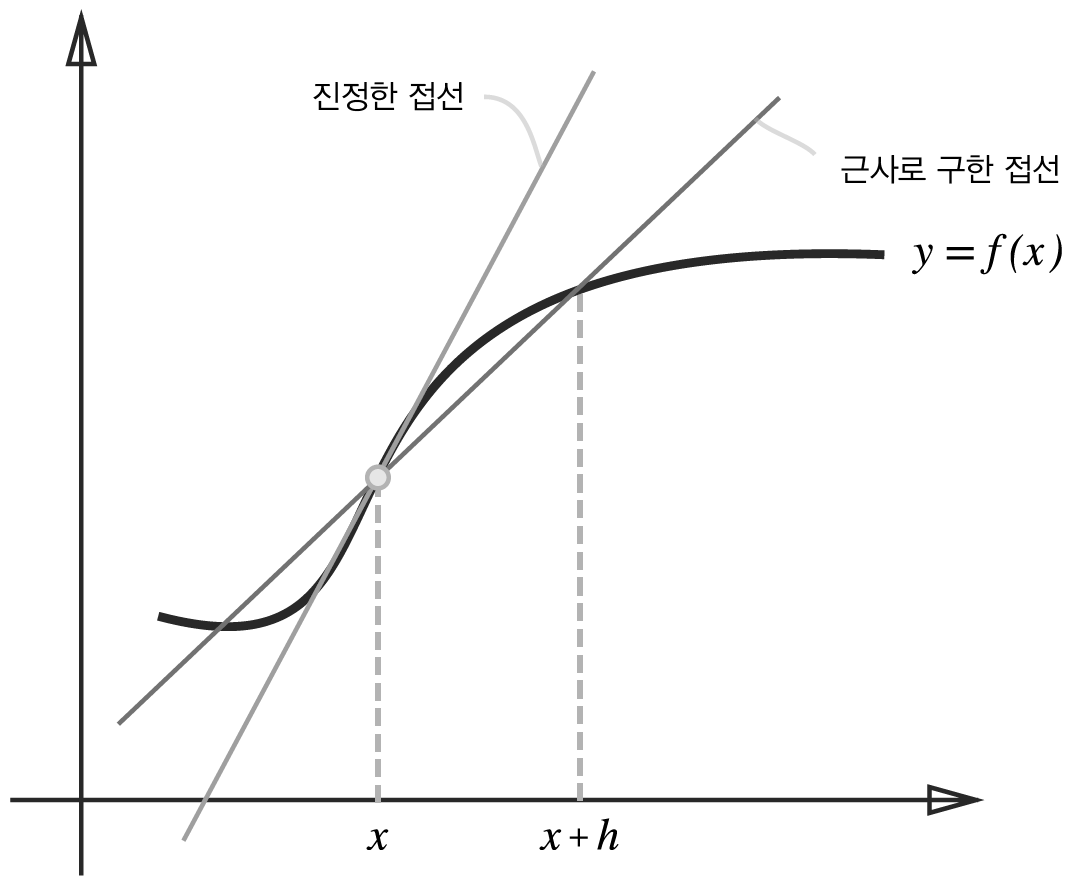

#### ※ 근사로 구한 접선 --> 할선

## 예제. y=2x^2의 도함수를 구해보시오.

In [42]:
def f(x):
    return 2*x**2
    


def numerial_diff(f,x):
    h = 0.001
    return (f(x+h)-f(x-h))/2*h

print(numerial_diff(f,2)) #오차가 발생함 진정한 미분이 아니라서 (할선을 이용하기때문)

7.999999999999119e-06


### ■ 신경망을 학습 시킬 때 왜 미분이 필요한가?

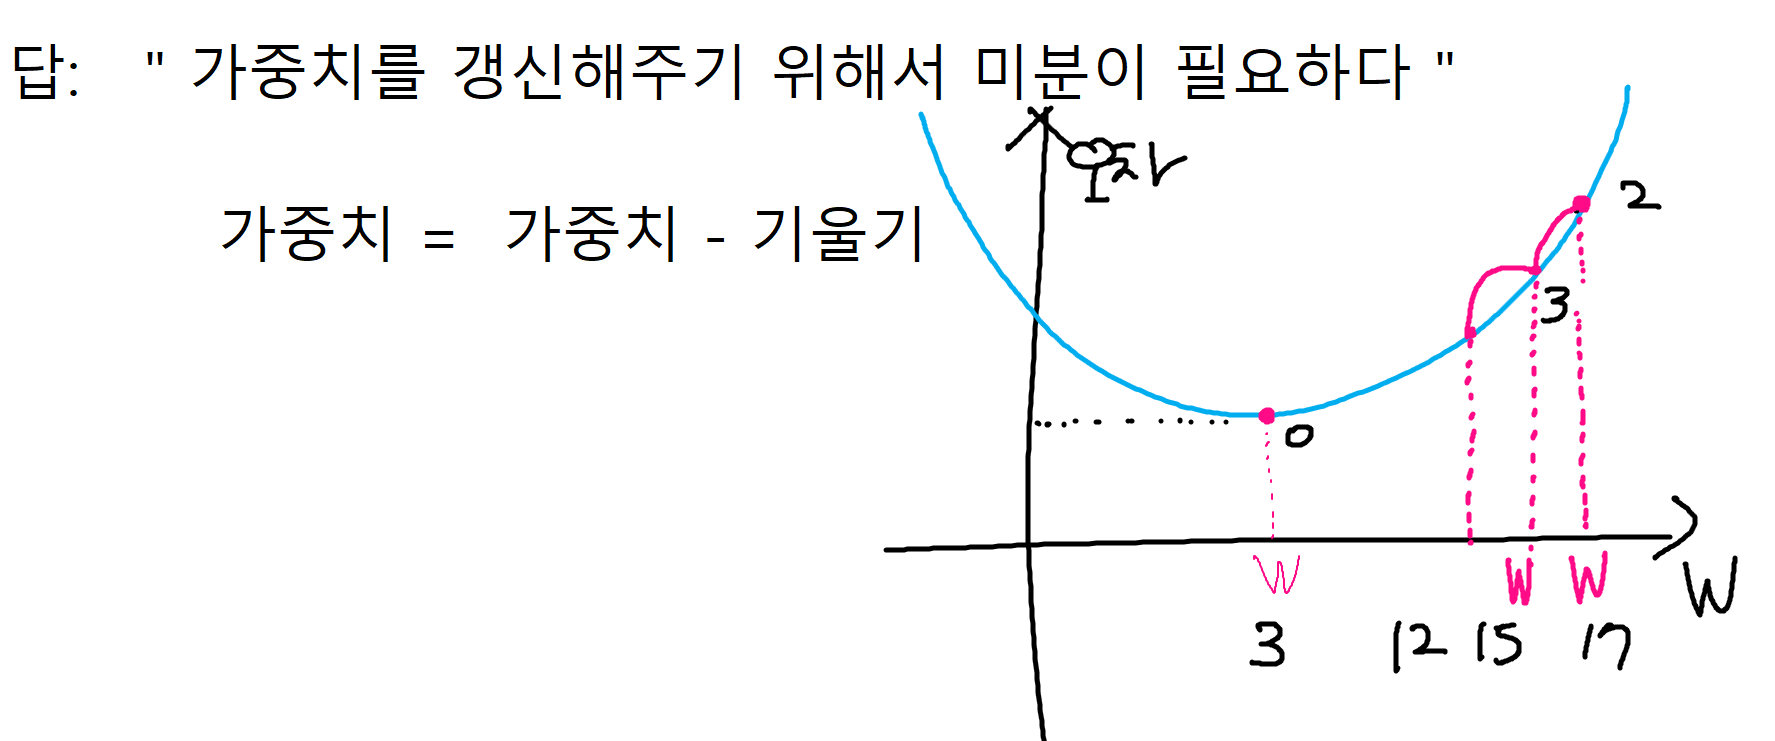

## 문제40. (오늘의 마지막 문제)  
## 아래의 함수를 생성하고 x가 2에서의 미분계수(기울기)를 구하는데     
## 아래의 함수의 도함수를 구해서 x가 2에서의 기울기가 같은지 확인하시오.  

y = 3x^4 + 2x^3 + 6x^2 + 7

1. print(numerical_diff(f,2)) #144
2. 도함수 y_dof 를 생성해서 print(y_dof(2)) #144

In [66]:
def f(x):
    return (3*x**4) + (2*x**3) + (6*x**2) + 7

def numerical_diff(f,x):
    h = 0.001
    return (f(x+h)-f(x-h)) / (2*h)


print(numerical_diff(f,2))

144.0000259999792


In [64]:
def y_dof(x):
    return 12*x**3 + 6*x**2 + 12*x

print(y_dof(2))

144
